In [1]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import zipfile
import cv2
import numpy as np
import pandas as pd
from scipy.ndimage import median_filter
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder

# import Deep learning Libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,InputLayer, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.utils import to_categorical
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')





modules loaded


In [2]:
dataset_path = 'C:/Users/PMLS/Downloads/CCN_MODEL_training (2)/CCN_MODEL_training/FER training/Fer2013_dataset/train'

data = []
labels = []
paths = []
# Iterate through the dataset directory
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        paths.append(img_path)
        img = cv2.imread(img_path) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale (1 channel)
        img = np.expand_dims(img, axis=-1)  # Add an extra dimension to make it (48, 48, 1)
        data.append(img)
        labels.append(class_name)


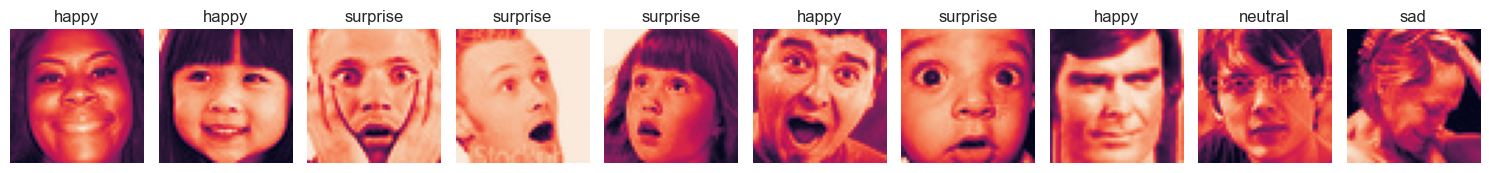

In [3]:
dataset_path = 'C:/Users/PMLS/Downloads/CCN_MODEL_training (2)/CCN_MODEL_training/FER training/Fer2013_dataset/train'
def display_random_images(images, labels, num_images=10):
    num_total_images = len(images)
    random_indices = np.random.choice(num_total_images, size=num_images, replace=False)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, idx in enumerate(random_indices):
        axes[i].imshow(images[idx])
        axes[i].set_title(labels[idx])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

display_random_images(data, labels)

In [4]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42 , stratify = labels)

In [6]:
y_train = to_categorical(y_train, num_classes=7)  # Convert training labels to one-hot encoded format
y_test = to_categorical(y_test, num_classes=7) 

In [7]:

# Normalize the data
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0


In [8]:
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

print("x_train data type:", x_train.dtype)
print("y_train data type:", y_train.dtype)
print("x_test data type:", x_test.dtype)
print("y_test data type:", y_test.dtype)

<class 'numpy.ndarray'> (22967, 48, 48, 1)
<class 'numpy.ndarray'> (22967, 7)
<class 'numpy.ndarray'> (5742, 48, 48, 1)
<class 'numpy.ndarray'> (5742, 7)
x_train data type: float64
y_train data type: float64
x_test data type: float64
y_test data type: float64


In [11]:

import os
import cv2
import numpy as np
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
# Load the JSON file
with open("C:/Users/PC/Desktop/CCN_MODEL_training/webcam_test/Facial Expression Recognition.json", "r") as json_file:
    model_json = json_file.read()

# Recreate the model from JSON
#model = model_from_json(model_json, custom_objects={"Sequential": Sequential})

# Load the model weights
#model.load_weights('C:/Users/PC/Desktop/CCN_MODEL_training/webcam_test/fer.h5')

model=load_model("C:/Users/PC/Desktop/CCN_MODEL_training/webcam_test/fer_best.keras")
print("Model loaded successfully")

# Compile the model before training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_callback = ModelCheckpoint(
    'C:/Users/PC/Desktop/CCN_MODEL_training/webcam_test/fer_best.keras',
    monitor='loss',  # You can monitor 'accuracy' as well
    save_best_only=True,
    save_weights_only=False,  # Save the full model
    mode='min',  # 'min' for loss, 'max' for accuracy
    verbose=1
)

model.fit(
    x_train, 
    y_train, 
    batch_size=32,
    epochs=50,  # Adjust the number of epochs as needed
    validation_data=(x_test, y_test),  # Validation on test data
    callbacks=[checkpoint_callback]  # Save the best model during training
)

print("Training complete")

Model loaded successfully
Epoch 1/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9459 - loss: 0.1648
Epoch 1: loss improved from inf to 0.16916, saving model to C:/Users/PC/Desktop/CCN_MODEL_training/webcam_test/fer_best.keras
718/718 ━━━━━━━━━━━━━━━━━━━━ 166s 207ms/step - accuracy: 0.9459 - loss: 0.1648 - val_accuracy: 0.5967 - val_loss: 2.6580
Epoch 2/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.9412 - loss: 0.1713
Epoch 2: loss did not improve from 0.16916
718/718 ━━━━━━━━━━━━━━━━━━━━ 144s 200ms/step - accuracy: 0.9412 - loss: 0.1713 - val_accuracy: 0.5932 - val_loss: 2.5856
Epoch 3/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9461 - loss: 0.1515
Epoch 3: loss improved from 0.16916 to 0.15771, saving model to C:/Users/PC/Desktop/CCN_MODEL_training/webcam_test/fer_best.keras
718/718 ━━━━━━━━━━━━━━━━━━━━ 148s 207ms/step - accuracy: 0.9461 - loss: 0.1515 - val_accuracy: 0.5947 - val_loss: 2.4960
Epoch 4/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms

In [ ]:
strat = df['label']
train_df,validate_df = train_test_split(df,train_size = 0.80,shuffle = True, random_state = 42, stratify = strat)

In [ ]:
batch_size = 64
img_size = (48,48)
channels = 3
img_shape = (img_size[0],img_size[1],channels)

# Create different ImageDataGenerator objects for training and testing/validation sets
train_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range = 0.1,   
    height_shift_range = 0.1,
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True)
valid_gen = ImageDataGenerator(rescale=1./255)


# Specify the directory argument for each set
train_gen = train_gen.flow_from_dataframe(dataframe = train_df, x_col = 'data' ,y_col = 'label', target_size = img_size, class_mode = 'categorical',color_mode = 'grayscale'
                                      , shuffle = True, batch_size = batch_size)
validate_gen = valid_gen.flow_from_dataframe(dataframe = validate_df,x_col = 'data' ,y_col = 'label', target_size = img_size, class_mode = 'categorical',color_mode = 'grayscale',
                                          shuffle = True, batch_size = batch_size)

In [ ]:
history = model.fit(x= train_gen, epochs = 500 , verbose = 1,validation_data = validate_gen,shuffle = True) #80

In [ ]:
model.save('cnn_fer_optimal.h5')

In [ ]:
   # Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
list(train_gen.class_indices.keys())

In [ ]:

# Get the true labels and predicted labels for the validation set
validation_labels = validate_gen.classes
validation_pred_probs = model.predict(validate_gen)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_gen.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [19]:
def plot_image(i, pred_array, true_label, img):
    # Select the i-th image's prediction and true label
    pred = pred_array[i]  # Predicted probabilities for the i-th image
    true = true_label[i]   # True label for the i-th image
    image = img[i]         # The image data for the i-th image

    plt.grid(False)
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.imshow(image, cmap=plt.cm.binary)  # Display the image

    # Get the predicted label index
    predicted_label = np.argmax(pred)

    # Compare predicted label with true label and set the color
    if predicted_label == true:
        color = 'blue'  # Correct prediction
    else:
        color = 'red'   # Incorrect prediction

    # Display label with predicted and true label information
    plt.xlabel(f"{pred_array[predicted_label]} {100 * np.max(pred):2.0f}% ({pred_array[true]})", color=color)
    plt.title(f"Image {i + 1}")


    

In [20]:
def plot_activation_value(i, pred_probs, true_labels):
    # Get the predicted class and true label
    pred = pred_probs[i]
    predicted_label = np.argmax(pred)  # Predicted class (index of max probability)
    
    # Get the corresponding true label for the current index i
    true_label = true_labels[i]
    
    # Compare predicted label with true label and set the color
    if predicted_label == true_label:
        color = 'blue'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction

    # Plot the image
    plt.imshow(x_test[i])
    plt.title(f'Pred: {predicted_label}, True: {true_label}', color=color)
    plt.axis('off')



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the list of label names
label_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def plot_image(i, predictions, true_labels, images, ax):
    # Get the predicted label by finding the index of the max value in the prediction
    pred = predictions[i]
    
    # Handle the case where the predicted label is an array (e.g., one-hot encoded or probability vector)
    predicted_label = np.argmax(pred)  # This gives us a scalar label (e.g., 0, 1, 2, ..., 6)
    
    # Get the true label for the current image
    true_label = true_labels[i]
    
    # Convert one-hot encoded vector to the index if needed
    true_label = np.argmax(true_label)  # Convert one-hot to scalar
    
    # Get the image corresponding to index i
    image = images[i]
    
    # Map the predicted and true labels to their corresponding names
    predicted_label_name = label_names[predicted_label]
    true_label_name = label_names[true_label]
    
    # Set the color based on whether the prediction was correct or not
    if predicted_label == true_label:
        color = 'blue'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
    
    # Plot the image with the predicted label and true label
    ax.imshow(image, cmap=plt.cm.binary)
    ax.set_title(f"Pred: {predicted_label_name}\nTrue: {true_label_name}", color=color)
    ax.axis('off')  # Hide axes

def plot_images_in_grid(predictions, true_labels, images, num_images=10, grid_size=(2, 5)):
    # Create a grid of subplots
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(15, 6))
    
    # Flatten the axes array to make it easier to index
    axes = axes.flatten()
    
    # Loop through the grid and plot images
    for i in range(num_images):
        plot_image(i, predictions, true_labels, images, axes[i])

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

# Example usage: Display 15 images in a grid with 3 rows and 5 columns
plot_images_in_grid(validation_pred_probs, y_test, x_test, num_images=50, grid_size=(5,10))
